In [1]:
import pandas as pd
import numpy as np
dataset = pd.read_excel('data.xlsx') 

In [2]:
dataset_f=dataset.drop(dataset.index[dataset['YEAR']==2009])
dataset_f['GOSZAKUP/EARNING']=dataset_f['GOSZAKUP']/dataset_f['EARNING']
dataset_f['SUBSIDIES/EARNING']=dataset_f['SUBSIDIES']/dataset_f['EARNING']
dataset_f['NIOKR/EARNING']=dataset_f['NIOKR']/dataset_f['EARNING']
dataset_f['LAG_GOSZAKUP/EARNING']=dataset_f['LAG_GOSZAKUP']/dataset_f['LAG_EARNING']
dataset_f['LAG_SUBSIDIES/EARNING']=dataset_f['LAG_SUBSIDIES']/dataset_f['LAG_EARNING']
dataset_f['POLITIC*AGE_2019']=dataset_f['POLITIC']*dataset_f['AGE_2019']
dataset_f['LAG_GOSZAKUP/EARNING*AGE_2019']=dataset_f['LAG_GOSZAKUP/EARNING']*dataset_f['AGE_2019']
dataset_f=dataset_f.set_index(['INN','YEAR'])

In [3]:
from linearmodels import PanelOLS
import statsmodels.api as sm
from linearmodels import RandomEffects

/Users/nailya/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/Users/nailya/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


[Text(0, 0.5, 'NIOKR'),
 Text(0, 1.5, 'GOSZAKUP'),
 Text(0, 2.5, 'EARNING'),
 Text(0, 3.5, 'AGE_2019'),
 Text(0, 4.5, 'CLEAN_PROFIT'),
 Text(0, 5.5, 'SIZE'),
 Text(0, 6.5, 'SUBSIDIES'),
 Text(0, 7.5, 'DISTANCE_MSK')]

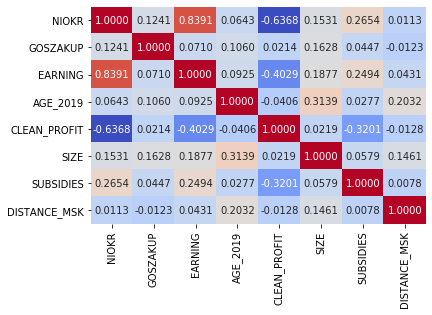

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

df_corr=dataset_f[['NIOKR','GOSZAKUP','EARNING','AGE_2019','CLEAN_PROFIT','SIZE','SUBSIDIES','DISTANCE_MSK']]
df = pd.DataFrame(np.random.random((6, 4)), columns=list('ABCD'))
fig, ax = plt.subplots()
sns.heatmap(df_corr.corr(method='pearson'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
#df_corr.describe().to_excel("my_description.xlsx")

In [5]:
#пример кода регрессии (на примере регрессии (1), в остальных случаях (2)-(9) досточно поменять переменные)

exog_vars = ['POLITIC','GOSZAKUP','SUBSIDIES','EARNING','CLEAN_PROFIT','AGE_2019','SIZE','DISTANCE_MSK']
exog = sm.add_constant(dataset_f[exog_vars])

endog = dataset_f['NIOKR']
# random effects model
model_re = RandomEffects(endog, exog) 
re_res = model_re.fit() 
#print results
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                  NIOKR   R-squared:                        0.8069
Estimator:              RandomEffects   R-squared (Between):              0.9570
No. Observations:                1210   R-squared (Within):               0.4939
Date:                Tue, May 11 2021   R-squared (Overall):              0.8246
Time:                        22:45:25   Log-likelihood                   -8714.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      627.51
Entities:                         117   P-value                           0.0000
Avg Obs:                       10.342   Distribution:                  F(8,1201)
Min Obs:                      10.0000                                           
Max Obs:                       20.000   F-statistic (robust):             627.49
                            